## Problems Six -- Ten: Q-Learning in Gridworld

This is an experiment with Reinforcement Learning a Grid World, a simple
problem in which a single agent moves around a 2D grid in search of a goal state where
a reward sits waiting.

In general, it "costs" 1 unit to move, so that many cells may have an immediate reward of -1.
There are also "holes" where the game terminates and the immediate reward is -100.
The start state has a reward of 0 and the goal state has a reward of 100. The trial
terminates at holes and in the goal state. 

The next two cells show how each world is created as an object with a grid of rewards, 
a start state, and terminal states (where the current trial will end). 

In [24]:
# Each grid world has a 2d matrix of rewards (which also gives the dimensions of the matrix),
# a start state, and a list of terminal states, where a trial will terminate


class GridWorld:
 
    # constructor
    def __init__(self, reward_grid, start_state, terminal_states):
        self.reward_grid = reward_grid
        self.terminal_states = terminal_states
        self.start_state = start_state
        self.num_rows = len(reward_grid)
        self.num_cols = len(reward_grid[0])
    
    # rewards in each state
    
    def R(self,state):
        (r,c) = state
        return self.reward_grid[r][c]
    
    # print out the rewards in text form
    
    def print_rewards(self):
        print("Rewards")
        width = 5
        hrule = ('-------'*self.num_cols)+'-'

        print(hrule)
        for r in range(self.num_rows):
            print('|',end='')
            for c in range(self.num_cols):  
                if (r,c) == self.start_state:
                    print(f"{0:{width}} |",end='')
                else:
                    print(f"{self.reward_grid[r][c]:{width}} |",end='')
            print('\n'+hrule)
    
    # Display the grid with colors and show the start and goal
    
    def display_heat_map(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_title('Grid World')
        ax.xaxis.set_ticks(range(20))             # assumes that no more than 20 rows or columns
        ax.yaxis.set_ticks(range(20))
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
        ax.imshow(self.reward_grid,extent=(0,self.num_cols,0,self.num_rows))
        (r,c) = self.start_state
        ax.scatter(c+0.5,self.num_rows-r-0.5,color='r',marker='o')
        ax.grid(True)
        plt.show()
        


World 0 

Rewards
---------------
|    0 |   -1 |
---------------
|   -1 |  100 |
---------------


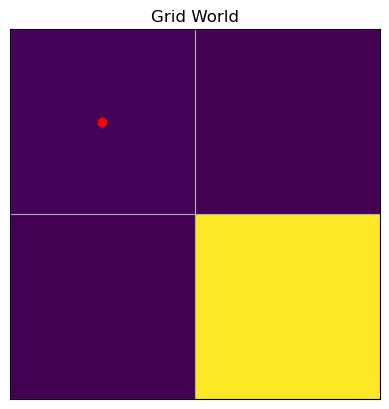

Terminal states: [(1, 1)]


World 1 

Rewards
----------------------
|   -1 |   -1 |   -1 |
----------------------
|    0 | -100 |  100 |
----------------------


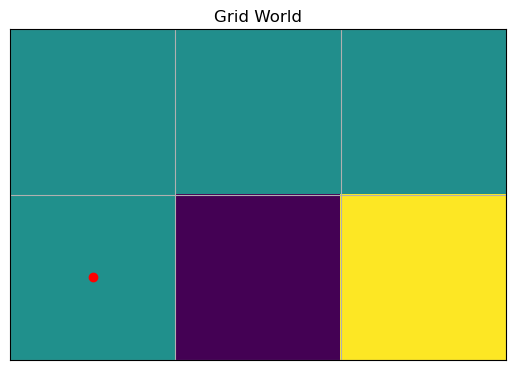

Terminal states: [(1, 1), (1, 2)]


World 2 

Rewards
-------------------------------------------------------------------------------------
|   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |
-------------------------------------------------------------------------------------
|   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |
-------------------------------------------------------------------------------------
|   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |   -1 |
-------------------------------------------------------------------------------------
|    0 | -100 | -100 | -100 | -100 | -100 | -100 | -100 | -100 | -100 | -100 |  100 |
-------------------------------------------------------------------------------------


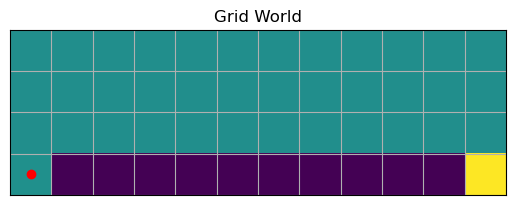

Terminal states: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11)]


World 3 

Rewards
------------------------------------------------------------------------------
|   -1 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 |
------------------------------------------------------------------------------
|   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 |
------------------------------------------------------------------------------
|   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 |
------------------------------------------------------------------------------
|    0 | -100 |   -1 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 | -100 |  100 |
------------------------------------------------------------------------------


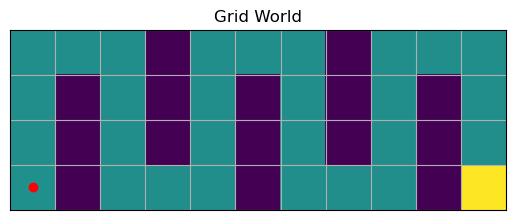

Terminal states: [(0, 3), (0, 7), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 5), (3, 9), (3, 10)]


World 4 

Rewards
-------------------------------------------------------------------------------------
|    0 |-1.04 |-1.13 |-1.31 |-1.51 |-1.64 |-1.68 |-1.84 |-2.42 |-3.45 |-4.52 |-4.98 |
-------------------------------------------------------------------------------------
|-1.02 |-1.09 | -1.3 | -1.7 |-2.16 | -2.4 |-2.31 |-2.18 |-2.44 |-3.22 |-4.12 |-4.51 |
-------------------------------------------------------------------------------------
|-1.04 |-1.16 | -1.5 |-2.16 |-2.91 |-3.28 |-3.01 |-2.48 |-2.29 |-2.62 |-3.17 |-3.42 |
-------------------------------------------------------------------------------------
|-1.05 |-1.19 | -1.6 |-2.37 |-3.27 | -3.7 |-3.34 |-2.57 |-2.03 |-1.98 |-2.18 | -2.3 |
-------------------------------------------------------------------------------------
|-1.06 |-1.18 |-1.53 | -2.2 | -3.0 |-3.41 |-3.11 |-2.38 |-1

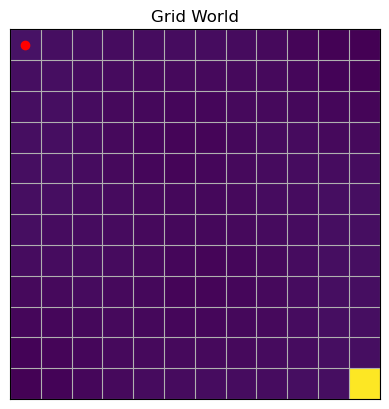

Terminal states: [(11, 11)]


World 5 

Rewards
-----------------------------------------------------------------------
|    0 | -2.8 | -4.0 | -4.6 | -5.8 | -3.5 | -5.6 | -1.1 | -0.4 | -6.2 |
-----------------------------------------------------------------------
| -2.1 | -4.7 | -4.3 | -0.7 | -9.3 | -9.1 | -9.8 | -1.7 | -2.2 | -1.3 |
-----------------------------------------------------------------------
| -0.2 | -2.0 | -5.4 | -2.2 | -8.8 | -3.6 | -8.6 | -0.6 | -4.8 | -5.9 |
-----------------------------------------------------------------------
| -7.4 | -2.3 | -5.4 | -4.3 | -9.8 | -3.8 | -3.9 | -3.8 | -0.6 | -3.2 |
-----------------------------------------------------------------------
| -6.4 | -5.6 | -3.0 | -9.4 | -3.3 | -3.3 | -7.9 | -8.7 | -6.8 | -6.4 |
-----------------------------------------------------------------------
| -4.3 | -5.6 | -0.1 | -9.0 | -7.9 | -8.4 | -3.5 | -7.5 | -5.3 | -7.6 |
-----------------------------------------------------------------------
| -8.4 | -8.9 | 

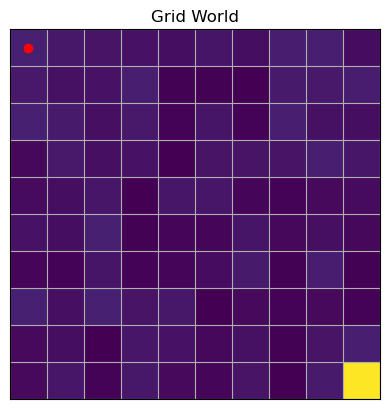

Terminal states: [(9, 9)]


World 6 

Rewards
-------------------------------------------
|    0 | -100 | -100 |   -1 |   -1 |   -1 |
-------------------------------------------
|   -1 |   -1 |   -1 | -100 |   -1 |  -10 |
-------------------------------------------
| -100 |   -1 | -100 |   -1 |   -1 |   -1 |
-------------------------------------------
| -100 |   -1 |   -1 |   -1 | -100 |   -1 |
-------------------------------------------
|   -1 |   -1 | -100 |   -1 | -100 |   -1 |
-------------------------------------------
| -100 | -100 |   -1 |   -1 |  100 |   -1 |
-------------------------------------------


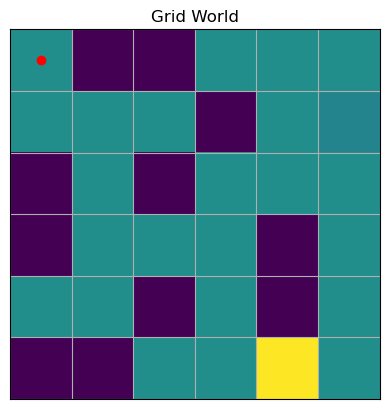

Terminal states: [(0, 1), (0, 2), (1, 3), (2, 0), (2, 2), (3, 0), (3, 4), (4, 2), (4, 4), (5, 0), (5, 1), (5, 4)]


World 7 

Rewards
-------------------------------------------
|    0 | -100 | -100 |   -1 |   -1 |   -1 |
-------------------------------------------
|   -1 |   -1 |   -1 | -100 |   -1 | -100 |
-------------------------------------------
| -100 |   -1 | -100 |   -1 |   -1 |   -1 |
-------------------------------------------
| -100 |   -1 |   -1 |   -1 | -100 |   -1 |
-------------------------------------------
|   -1 |   -1 | -100 |   -1 | -100 |   -1 |
-------------------------------------------
| -100 |   -1 |   -1 | -100 |  100 |   -1 |
-------------------------------------------


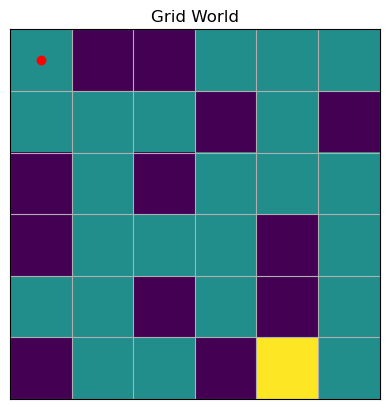

Terminal states: [(0, 1), (0, 2), (1, 3), (1, 5), (2, 0), (2, 2), (3, 0), (3, 4), (4, 2), (4, 4), (5, 0), (5, 3), (5, 4)]


World 8 

Rewards
-------------------------------------------------------------------------------------
|    0 |    0 | -100 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 | -100 | -100 |   -1 |
-------------------------------------------------------------------------------------
|   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 |   -1 |   -1 |   -1 |
-------------------------------------------------------------------------------------
|   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 |   -1 | -100 | -100 |   -1 |
-------------------------------------------------------------------------------------
|   -1 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 | -100 |   -1 |   -1 |   -1 | -100 |
-------------------------------------------------------------------------------------
|   -1 | -100 |   -1 | -100 | -100 | -100 |   -1 |   -1 | -100 | -100 |   -1 |   -1 

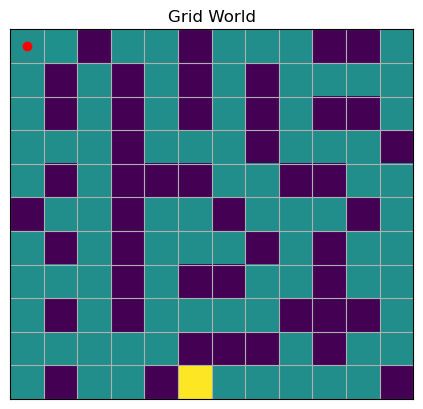

Terminal states: [(0, 2), (0, 5), (0, 9), (0, 10), (1, 1), (1, 3), (1, 5), (1, 7), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (2, 10), (3, 3), (3, 7), (3, 11), (4, 1), (4, 3), (4, 4), (4, 5), (4, 8), (4, 9), (5, 0), (5, 3), (5, 6), (5, 10), (6, 1), (6, 3), (6, 7), (6, 9), (7, 3), (7, 5), (7, 6), (7, 9), (8, 1), (8, 3), (8, 8), (8, 9), (8, 10), (9, 5), (9, 6), (9, 7), (9, 9), (10, 1), (10, 4), (10, 5), (10, 11)]



In [25]:
# Grid worlds initialization

World = []          #   room for 10 example grid worlds

# return a list of all states which have rewards which only occur in terminal states

def get_terminal_states(grid,terminal_rewards=[-100,100]):
    TS = []
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] in terminal_rewards:
                TS.append((r,c))
    return TS

# World[0]: simple test case, two paths



World.append( GridWorld( [ [0,-1,], 
                        [-1,100] 
                      ], 
                      (0,0), 
                      [(1,1)] 
                    )
            )

# World[1]: short cliff walking

World.append( GridWorld( [ [-1,-1,-1], 
                        [0,-100,100] 
                      ], 
                      (1,0), 
                      [(1,1),(1,2)] 
                    )
            )

# World[2]: cliff walking from lecture

grid =                   [ [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
                           [0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,100]
                         ]

World.append( GridWorld( grid, (3,0), get_terminal_states(grid) ) )


# World[3]: walking a serpentine path

grid =                [ [-1,  -1,-1,-100,-1,  -1,-1,-100,-1,  -1, -1],
                        [-1,-100,-1,-100,-1,-100,-1,-100,-1,-100, -1],
                        [-1,-100,-1,-100,-1,-100,-1,-100,-1,-100, -1],
                        [ 0,-100,-1,  -1,-1,-100,-1,  -1,-1,-100,100]
                      ]

World.append( GridWorld( grid, (3,0), get_terminal_states(grid) ) )

# World[4]: This one has six "valleys" and the agent has to find the best path around them.

def makeGridTerrain(num_rows,num_cols,Valleys):

    W = np.zeros((num_rows,num_cols))
    W.fill(-1)
    
    # Use the PDF of a 2D normal and subtract from the default -1

    for V in Valleys:  
        var = multivariate_normal(mean=V[0], cov=[[V[1],0],[0,V[2]]])
        for r in range(num_rows):
            for c in range(num_cols):
                W[r][c] -=  var.pdf([r,c])*V[3]*10

    # add start and goal states
    
    W[0][0] = 0
    W[num_rows-1][num_cols-1] = 100
    
    return np.around(W,2)

# List of valleys, each a tuple (mean = center, std_rows, std_cols, depth)

Valleys = [([0,11], 4, 4, 10),
           ([11,0], 5, 5, 10),
           ([3,5], 3, 3, 5),
           ([8,6], 3, 3, 5),
          ]


World.append( GridWorld( makeGridTerrain(12,12,Valleys), (0,0), [(11,11)] ) )
               

# World[5]: This one is completely random!

seed(0); grid = np.around(10*rand(10,10)-10,1); grid[0][0] = 0; grid[9][9] = 100

World.append( GridWorld( grid, (0,0), [(9,9)]) )

# World[6]: Simple maze

grid =                [[-1, -100, -100, -1, -1, -1], 
                       [-1, -1, -1, -100, -1, -10], 
                       [-100, -1, -100, -1, -1, -1], 
                       [-100, -1, -1, -1, -100, -1], 
                       [-1, -1, -100, -1, -100, -1], 
                       [-100, -100, -1, -1, 100, -1]
                      ]

World.append( GridWorld( grid, (0,0), get_terminal_states(grid) ) )

# World[6]: More difficult maze

grid =                [[-1, -100, -100, -1, -1, -1], 
                       [-1, -1, -1, -100, -1, -100], 
                       [-100, -1, -100, -1, -1, -1], 
                       [-100, -1, -1, -1, -100, -1], 
                       [-1, -1, -100, -1, -100, -1], 
                       [-100, -1, -1, -100, 100, -1]
                      ]

World.append( GridWorld( grid, (0,0), get_terminal_states(grid) ) )


# World[7]: Hard maze

grid =                [[ -1,  0,  -100,-1,  -1, -100,  -1,  -1,  -1,   -100, -100,  -1 ], 
                       [ -1, -100,  -1, -100,  -1, -100,  -1, -100,  -1,  -1,  -1,  -1 ], 
                       [ -1, -100,  -1, -100,  -1, -100,  -1, -100,  -1, -100, -100,  -1 ], 
                       [ -1,  -1,  -1, -100,  -1,  -1,  -1, -100,  -1,  -1,  -1, -100 ], 
                       [ -1, -100,  -1, -100,   -100, -100,  -1,  -1, -100, -100,  -1,  -1 ], 
                       [-100,  -1,  -1, -100,  -1,  -1, -100,  -1,  -1,  -1, -100,  -1 ], 
                       [ -1, -100,  -1, -100,  -1,  -1,  -1, -100,  -1, -100,  -1,  -1 ], 
                       [ -1,  -1,  -1, -100,  -1, -100, -100,  -1,  -1, -100,  -1,  -1 ], 
                       [ -1, -100,  -1, -100,  -1,  -1,  -1,  -1, -100, -100,   -100,  -1 ], 
                       [ -1,  -1,  -1,  -1,  -1, -100, -100, -100,  -1, -100,  -1,  -1 ], 
                       [ -1, -100,  -1,  -1, -100,  100,  -1,  -1,  -1,  -1,  -1, -100 ]
                      ]

World.append( GridWorld( grid, (0,0), get_terminal_states(grid) ) )
                     

# test

for N in range(len(World)):
    print("\nWorld",N,'\n')
    World[N].print_rewards()
    World[N].display_heat_map()
    print("Terminal states:",World[N].terminal_states)
    print()

In [911]:
# from collections import defaultdict

# Actions for each state
# These are lists so can use np.random.choice for exploration 

Moves     = ['U','R','L','D']
    
def initialize_Actions(W):
    actions = defaultdict(lambda: Moves.copy())
    
    for r in range(W.num_rows):
        for c in range(W.num_cols):
            current_actions = []
            if r > 0:
                current_actions.append('U')
            if c < W.num_cols - 1:
                current_actions.append('R')
            if c > 0:
                current_actions.append('L')
            if r < W.num_rows - 1:
                current_actions.append('D')
                
            actions[(r, c)] = current_actions
            
    return actions


# test for several values of N
N = 1
World[N].print_rewards()
A = initialize_Actions(World[N])

print(A[(1,2)])

A

Rewards
----------------------
|   -1 |   -1 |   -1 |
----------------------
|    0 | -100 |  100 |
----------------------
['U', 'L']


defaultdict(<function __main__.initialize_Actions.<locals>.<lambda>()>,
            {(0, 0): ['R', 'D'],
             (0, 1): ['R', 'L', 'D'],
             (0, 2): ['L', 'D'],
             (1, 0): ['U', 'R'],
             (1, 1): ['U', 'R', 'L'],
             (1, 2): ['U', 'L']})

In [912]:
# state transitions -- no error checking, will only be called on legal moves
    
def goto_state(s,a):
    dr_dc = {
        'U': (-1, 0),
        'R': (0, 1),
        'L': (0, -1),
        'D': (1, 0)
    }
    r, c = s
    dr, dc = dr_dc[a]
    return r + dr, c + dc


# test

for m in Moves:
    print(goto_state((2,3),m))

(1, 3)
(2, 4)
(2, 2)
(3, 3)


## Q-Table


In [917]:
# Q-Table is dictionary with keys (state,move) = ((row,col),move) mapped to Q-values

# Initialize non-terminal states with random default values in range -10..0; but
# must initialize all terminal states with 0.0 or else Q-values will not be accurate!

seed(0)

def initialize_Q_table(W, A):
    Q = {}
    
    for state in A:
        for action in A[state]:
            if state in W.terminal_states:
                Q[(state, action)] = 0.0
            else:
                Q[(state, action)] = np.random.uniform(-10, 0) # only way i could get it to randomize same as tests
    return Q


def print_Q_table(W,A,Q):
    print("Q-Table")
    width = 6
    precision = 4

    hrule = ('---------'*W.num_cols)+'-'

    print(hrule)
    for r in range(W.num_rows):
        for move in ['U','L','R','D']:
            for c in range(W.num_cols):
                if (r,c) in W.terminal_states:
                    print('|  '+(" "*width),end='')
                elif move in A[(r,c)]:
                    print('|'+move+':'+f"{np.around(Q[((r,c),move)],3):{width}.{precision}}",end='')
                else:
                    print('|'+move+':'+(" "*width),end='')

            print('|')
        print(hrule)

# test -- try for several values of N
 
seed(0)
N = 1
W = World[N]
A = initialize_Actions(World[N])
Q = initialize_Q_table(W,A)
print_Q_table(W,A,Q)

Q-Table
----------------------------
|U:      |U:      |U:      |
|L:      |L:-4.551|L:-3.541|
|R:-4.512|R:-3.972|R:      |
|D:-2.848|D:-5.763|D:-5.624|
----------------------------
|U:-1.082|        |        |
|L:      |        |        |
|R:-0.363|        |        |
|D:      |        |        |
----------------------------


## Determine allowable moves

Now we must create functions to determine the best allowable move, given A, Q, and the state,
and write an epsilon-greedy version of the strategy `Pi`. 

The best move is simply the allowable move from the current state with the maximum Q-value. 
Return the move as a character 'U', 'R', etc. 

The epsilon-greed strategy will choose a random move from those allowable in the current
state with probability `epsilon` or the best move with probability `1-epsilon`. 

In [854]:
# Strategy code for epsilon-greedy Pi

# find move with best Q-value in state s
def best_move(A,Q,s):
    best_q_value = -sys.maxsize
    best_action = None
    
    for action in A[s]:
#         print(Q[s, action])
        if Q[(s, action)] > best_q_value:
            best_q_value = Q[(s, action)]
            best_action = action
    return best_action
        

# epsilon-greedy strategy

def Pi(A, Q, s, epsilon):
    if random() < epsilon:
        return choice(A[s])
    else:
        return best_move(A, Q, s)

 

In [918]:
# Tests:   run this cell repeatedly to test for N == 1 two cells up
print(best_move(A,Q,(0,0)))   # 'D' 
print(best_move(A,Q,(0,2)))   # 'L' 
print()
print(Pi(A,Q,(1,0),0.0))    # 'R' 
print(Pi(A,Q,(1,0),0.5))    # should give 'R' about 3x as often as 'U'
print(Pi(A,Q,(1,0),1.0))    # should give approximately same number of 'U' and 'R'

D
L

R
R
U


In [920]:
# Pretty-printing code for Strategy
# Uses: best_move
        
def print_strategy(W,A,Q):
    print("Strategy Pi")
    width = 6
    precision = 4

    hrule = ('------'*W.num_cols)+'-'

    print(hrule)
    for r in range(W.num_rows):
        for k in range(3):
            for c in range(W.num_cols):
                if (r,c) in W.terminal_states:
                    print('|     ',end='')
                else:
                    move = best_move(A,Q,(r,c))
                    if k == 0:
                        if move in ['L','R']:
                            print('|     ',end='')
                        elif move == 'U':
                            print('|  ^  ',end='')
                        else:
                            print('|  |  ',end='')
                    elif k == 1:
                        if move =='R':
                            print('|---->',end='')
                        elif move == 'L':
                            print('|<----',end='')
                        else:
                            print('|  |  ',end='')                        
                    else: 
                        if move in ['L','R']:
                            print('|     ',end='')
                        elif move == 'D':
                            print('|  v  ',end='')
                        else:
                            print('|  |  ',end='')                   
            print('|')
        print(hrule)
    

## Experiment code

In this part we will create the framework for running multiple trials for the agent
to learn how to solve the GridWorld problem of maximizing rewards. 

There are several parameters of interest, as explained in lecture:

- epsilon =  for epsilon-greedy strategy, probability of exploration by random move

- lam = exponential decrease in epsilon    (can not use "lambda" because that is a keyword in Python)

- num_trials = number of random trials in this experiment

(We also thought about the use of a "learning rate" parameter `alpha` and a "discount" `gamma` for future rewards, but these seemed to only be a disadvantage in this simple GridWorld scenario.)


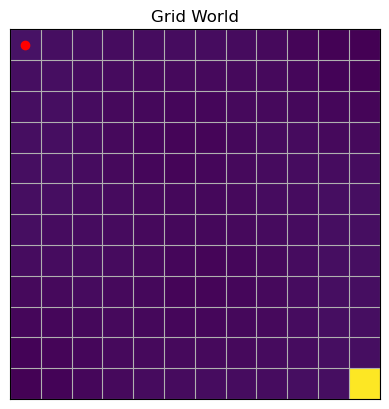


Rewards
-------------------------------------------------------------------------------------
|    0 |-1.04 |-1.13 |-1.31 |-1.51 |-1.64 |-1.68 |-1.84 |-2.42 |-3.45 |-4.52 |-4.98 |
-------------------------------------------------------------------------------------
|-1.02 |-1.09 | -1.3 | -1.7 |-2.16 | -2.4 |-2.31 |-2.18 |-2.44 |-3.22 |-4.12 |-4.51 |
-------------------------------------------------------------------------------------
|-1.04 |-1.16 | -1.5 |-2.16 |-2.91 |-3.28 |-3.01 |-2.48 |-2.29 |-2.62 |-3.17 |-3.42 |
-------------------------------------------------------------------------------------
|-1.05 |-1.19 | -1.6 |-2.37 |-3.27 | -3.7 |-3.34 |-2.57 |-2.03 |-1.98 |-2.18 | -2.3 |
-------------------------------------------------------------------------------------
|-1.06 |-1.18 |-1.53 | -2.2 | -3.0 |-3.41 |-3.11 |-2.38 |-1.77 |-1.52 |-1.52 |-1.55 |
-------------------------------------------------------------------------------------
|-1.11 |-1.18 | -1.4 |-1.87 |-2.47 |-2.87 |-2

In [1084]:
# Q-Algorithm code


def run_experiment(N,epsilon=0.25,lam=1.0,num_trials=1000,display=False):
       
    # initialize grid world N
    W = World[N]
       
    # use a seed to help with comparing results
    seed(0)
    
    # initialize A
    A = initialize_Actions(W)
    
    # initialize Q
    Q = initialize_Q_table(W, A)
    
    for _ in range(num_trials):
    
        # initialize the current state s to the start state
        s = W.start_state
        
        # while s is not a terminal state
        while s not in W.terminal_states:
            #  determine the action a from s using the policy Pi       
            a = Pi(A, Q, s, epsilon)
            #  determine the next state s1 given the action a
            s1 = goto_state(s, a)
            #  determine the reward and the best move in s1
            reward = W.R(s1)
            best_next_move = best_move(A, Q, s1)
            #  update Q-Table with the new Q-value for current state s = sum of reward in s1 and 
            #       Q-value of best move in s1;
            Q[(s, a)] = reward + Q[(s1, best_next_move)]

            #  update epsilon, reduced in each successive move by lam (if lam < 1 this means
            #      you will explore less and less as the trial goes on)
            epsilon *= lam
            #  update current state to s1
            s = s1
            
#     print(W.start_state)
#     print(s)
    # calculate the cumulative reward of the path given by the strategy implied by the Q-table
    
    s = W.start_state
    cumulative_reward = 0
    visited = set()
    
    cycle = False
    while s not in W.terminal_states:
        if s in visited:
            cycle = True
            break
        visited.add(s)
        a = best_move(A, Q, s)
        s = goto_state(s, a)
        cumulative_reward += W.R(s)
 
        
    # show all the data structures if you want
    
    if display:    
        W.display_heat_map()
        print()
        W.print_rewards()
        print()
        print_Q_table(W,A,Q)   
        print()
        print_strategy(W,A,Q)
        print()
    
    if cycle:
        return 0
    else:
        return cumulative_reward
# test
print("Reward:",run_experiment(4, num_trials=300, display=True, epsilon=1.0, lam=1.0))

## Running experiments

What parameters will solve the problem in the fewest number of trials?
      
"Solving" the problem means learning a "steady-state" strategy, meaning that if we increase
the number of trials, the strategy does not change.  The agent may accidentally hit on 
an optimal strategy, but continuing to search may "unlearn" the solution. The system
can only be said to have learned the optimal strategy only if it does not change as the number
of trials is increased. 

# World 0
I wrote a function, optimize(), to perform grid search on the parameters and find the ones that yield the best results.

For World 0, all sets of parameters manage to find max reward in at most 3 trials. Half manage to find it on the very first trial. I'm surprised that we don't find the optimal policy on the first trial at any epsilon=0; in a 2x2 world, any agent should be finding the win state immediately after any step, and with no random exploration, it should, theoretically, immediately pick the winning state.

The optimal parameters in this case are fairly meaningless, as about half of the parameter pairs achieve the same result.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                      2        99
     0.00      0.20                      2        99
     0.00      0.40                      2        99
     0.00      0.60                      2        99
     0.00      0.80                      2        99
     0.00      1.00                      2        99
     0.20      0.00                      2        99
     0.20      0.20                      2        99
     0.20      0.40                      2        99
     0.20      0.60                      2        99
     0.20      0.80                      2        99
     0.20      1.00                      2        99
     0.40      0.00                      2        99
     0.40      0.20                      2        99
     0.40      0.40                      2        99
     0.40      0.60                      2        99
     0.40      0.80                      2    

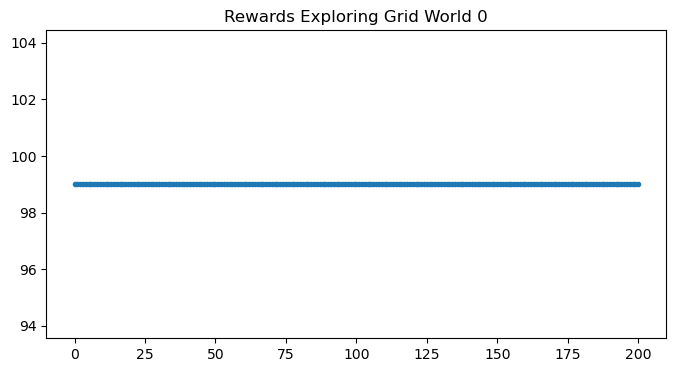

Reward: 99
Optimal epsilon: 0.6000000000000001
Optimal lambda: 0.0


In [1050]:
# Plotting the rewards to find smallest number of trials which produce a steady-state maximum reward

from tabulate import tabulate

def plot_rewards(N,lower_bound,upper_bound,epsilon=0.25,lam=1.0, display=True):
    
    X = range(lower_bound,upper_bound+1)

    Y = [run_experiment(N,epsilon=epsilon,lam=lam,num_trials=k,display=False) for k in X]
#     Y = []
#     for k in X:
#         result = run_experiment(N, epsilon=epsilon, lam=lam, num_trials=k, display=False)
#         print(result)
#         Y.append(result)
    if display:
        plt.figure(figsize=(8,4))
        plt.title('Rewards Exploring Grid World '+str(N))
        plt.plot(X,Y)
        plt.scatter(X,Y,marker='.')
        plt.show()

        print("Reward:",Y[-1])
    
    # under assumption that steady state was reached by the upper_bound, 
    # find the first time that value was found in this range
    steady_state_trials = lower_bound
    for k in range(len(Y)-1,-1, -1):
        if Y[k] < Y[-1]:
            steady_state_trials = X[k + 1]
            if display:
                print("Steady state found at",steady_state_trials,"trials.")
            break
            
    return steady_state_trials, Y[-1]
# example

def optimize(N, lower_bound, upper_bound, print_each=True):
    # Define the range of epsilon and lambda values to search over
    epsilon_values = np.arange(0, 1.2, 0.2)
    lambda_values = np.arange(0, 1.2, 0.2)

    # Initialize variables to keep track of the best parameter combination and the fastest steady state
    best_epsilon = None
    best_lambda = None
    fastest_steady = float('inf')
    highest_reward = float('-inf')

    # Create a list to store the results for each combination of epsilon and lambda values
    results = []

    # Iterate over all combinations of epsilon and lambda values
    for epsilon in epsilon_values:
        for lam in lambda_values:
            # Run the plot_rewards function and get the steady state
            steady, reward = plot_rewards(N, lower_bound, upper_bound, epsilon=epsilon, lam=lam, display=print_each)

            # Store the results for this combination
            results.append((epsilon, lam, steady, reward))

            # If the current reward is higher than the highest one found so far, update the best parameters and the highest reward
            if reward > highest_reward:
                highest_reward = reward
                fastest_steady = steady
                best_epsilon = epsilon
                best_lambda = lam
            # If the current reward is equal to the highest one found so far, check if the steady state is faster and update the best parameters if needed
            elif reward == highest_reward and steady < fastest_steady:
                fastest_steady = steady
                best_epsilon = epsilon
                best_lambda = lam

    # Print the table of results
    headers = ['Epsilon', 'Lambda', 'Steady State Trials', 'Reward']
    print(tabulate(results, headers=headers, floatfmt=".2f"))

    # Return the best parameter combination
    print()
    print("Optimal epsilon:", best_epsilon)
    print("Optimal lambda:", best_lambda)
    plot_rewards(N, lower_bound, upper_bound, best_epsilon, best_lambda)
    return best_epsilon, best_lambda

best_epsilon, best_lambda = optimize(0, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# plot_rewards(0,0,100)
# plot_rewards(0,0,100, epsilon=0)
# plot_rewards(0,0,100, epsilon=1)

# Discussion on world 0 is above the code cell

# World 1
Optimal epsilon: 0.2
Optimal lambda: 0.8

We find that a moderately low, slowly decreasing exploration rate works best in this case, but not significantly better. It's hard to make any meaningful judgements on why these parameters work better; the world is really small and it could just be due to randomness. Interestingly, lambda=1.0 seems to perform the worst here by far. This is probably because the world is very small and has one optimal path, so it we quickly get the optimal policy and exploring further only increases the chance that one of the random explorations will lead to a losing state.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                      4        97
     0.00      0.20                      4        97
     0.00      0.40                      4        97
     0.00      0.60                      4        97
     0.00      0.80                      4        97
     0.00      1.00                      4        97
     0.20      0.00                      4        97
     0.20      0.20                      4        97
     0.20      0.40                      4        97
     0.20      0.60                      4        97
     0.20      0.80                      3        97
     0.20      1.00                      5        97
     0.40      0.00                      4        97
     0.40      0.20                      4        97
     0.40      0.40                      4        97
     0.40      0.60                      4        97
     0.40      0.80                      4    

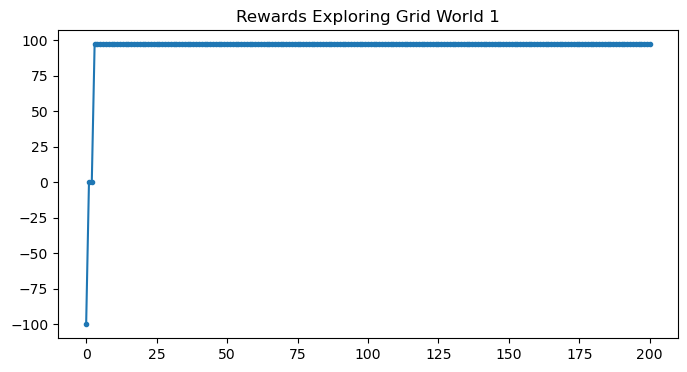

Reward: 97
Steady state found at 3 trials.
Optimal epsilon: 0.2
Optimal lambda: 0.8


In [1051]:
best_epsilon, best_lambda = optimize(1, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 2
Optimal epsilon: 0.4
Optimal lambda: 1.0

This world is interesting because 2 pairs of parameters yield a slightly higher reward than all the others, even though other parameters reach a steady state sooner at a slightly lower reward. Specifically, these two sets of parameters manage to find the only optimal path, while all the others make a mistake that they later have to correct for, with a total loss of 2 points. Both of the winning sets of parameters them have lambda=1.0. At the same time, in all cases, a constant exploration rate finds a steady state significantly later, for reasons I outlined in the previous comment. I'd guess that having a higher exploration rate later on helps correct these errors.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     33        86
     0.00      0.20                     33        86
     0.00      0.40                     33        86
     0.00      0.60                     33        86
     0.00      0.80                     33        86
     0.00      1.00                     33        86
     0.20      0.00                     33        86
     0.20      0.20                     33        86
     0.20      0.40                     33        86
     0.20      0.60                     33        86
     0.20      0.80                     33        86
     0.20      1.00                     42        86
     0.40      0.00                     33        86
     0.40      0.20                     33        86
     0.40      0.40                     33        86
     0.40      0.60                     33        86
     0.40      0.80                     30    

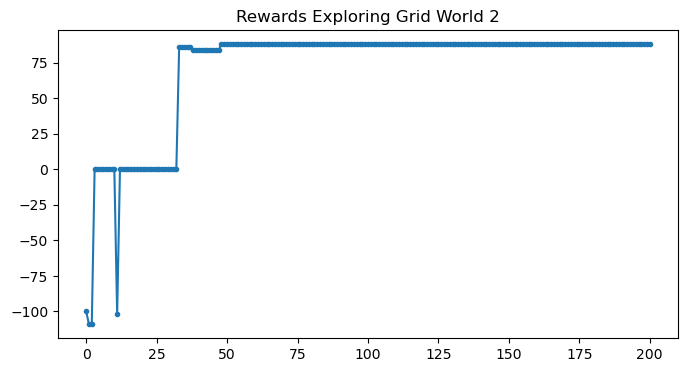

Reward: 88
Steady state found at 48 trials.
Optimal epsilon: 0.4
Optimal lambda: 1.0


In [1052]:
best_epsilon, best_lambda = optimize(2, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 3
Best pairs, all steady at 57 trials:

Epsilon, Lambda:
[0.2, 0.8] 
[1.0, 0.4] 
[1.0, 0.6]
[1.0, 0.8]

A high starting exploration rate seems to generally do better, but only slightly. This world is a maze with one path, which means the biggest threat is cycles. High exploration rates at the start probably help the policy get out of cycles more often. At the same time, there are losing states at almost every move, so we're also risking these more often in the initial trials, but it seems like the tradeoff is overall worth it. We also see that 0.2, 0.8 performs well.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     58        73
     0.00      0.20                     58        73
     0.00      0.40                     58        73
     0.00      0.60                     58        73
     0.00      0.80                     58        73
     0.00      1.00                     58        73
     0.20      0.00                     58        73
     0.20      0.20                     58        73
     0.20      0.40                     58        73
     0.20      0.60                     58        73
     0.20      0.80                     57        73
     0.20      1.00                    162         0
     0.40      0.00                     58        73
     0.40      0.20                     58        73
     0.40      0.40                     58        73
     0.40      0.60                     58        73
     0.40      0.80                     59    

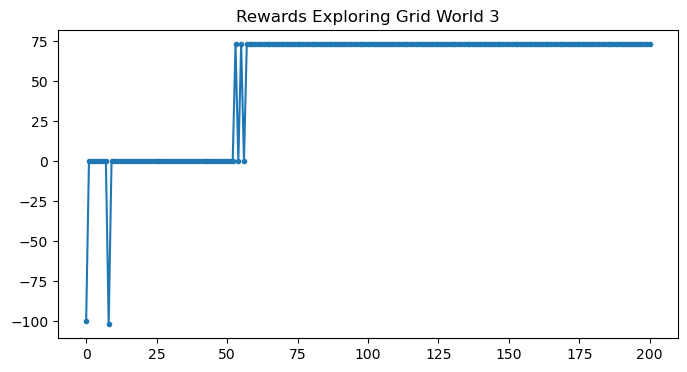

Reward: 73
Steady state found at 57 trials.
Optimal epsilon: 0.2
Optimal lambda: 0.8


In [1053]:
best_epsilon, best_lambda = optimize(3, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 4
This is a big world with no losing states, and we see that constant 100% exploration (1.0, 1,0) somehow gets the highest reward and also arrives at a steady rate the fastest by far at 25 trials. I'm guessing that this world is bad for greedy exploitation because the variable rewards deceptively distract from the optimal long-term behavior. By simply never looking at the rewards at all, the policy rather quickly arrives at the optimal path. I honestly have no idea how this happens in only 25 trials. All the other parameter pairs with lambda=1.0 also perform better, even if they always reach a steady state much later. Constant exploration helps iron out the suboptimal paths.

Overall, the immediate rewards appear to be deceptive enough that they always prevent arriving at the true optimal policy, unless we keep exploring in later trials.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     76     63.46
     0.00      0.20                     76     63.46
     0.00      0.40                     76     63.46
     0.00      0.60                     76     63.46
     0.00      0.80                     76     63.46
     0.00      1.00                     76     63.46
     0.20      0.00                     76     63.46
     0.20      0.20                     76     63.46
     0.20      0.40                     76     63.46
     0.20      0.60                     76     63.46
     0.20      0.80                     76     63.46
     0.20      1.00                    142     67.44
     0.40      0.00                     76     63.46
     0.40      0.20                     76     63.46
     0.40      0.40                     76     63.46
     0.40      0.60                     76     63.46
     0.40      0.80                     76    

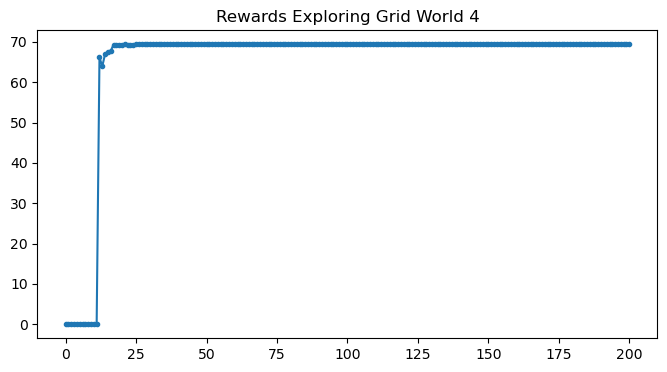

Reward: 69.41
Steady state found at 25 trials.
Optimal epsilon: 1.0
Optimal lambda: 1.0


In [1054]:
best_epsilon, best_lambda = optimize(4, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 5
This is also a maze without lose states like the previous world, but it's harder. Again, we can see that constant exploration rates are the only ones that manage to get the maximum reward. I'm realizing now - and this also applies to the previous world - that going down one long path of a maze is rewarding enough that it is likely to be exploited repeatedly, and the "walls" are "thin" enough that they don't affect the Q values near the start of the path enough to prevent the agent from exploiting a suboptimal path. The difference between two completely paths is often just one move, and that is the move the policy needs to "explore" in to have a chance at finding the optimal path. If exploration rates quickly become lower as we go on, the chance of exploring at the exact right time drops dramatically.

Again- we only achieve optimal policy if exploration is constant throughout all trials, regardless of the epsilon. Even at epsilon=0.2, there is a reasonable chance of exploration of every move, and with 140 trials, this manages to stack up to an optimal path.

Disregarding rewards altogether gets us the optimal path in 10 trials. This makes sense: just because there is a path in a maze wouldn't at all suggest to you that it's the right path. Near the start of the maze especially, it's entirely random which path is the best, regardless of which ones capture your intuition. So we need to ensure that we're exploring all possible paths, and this only happens if we keep exploring indefinitely.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     51     28.80
     0.00      0.20                     51     28.80
     0.00      0.40                     51     28.80
     0.00      0.60                     51     28.80
     0.00      0.80                     51     28.80
     0.00      1.00                     51     28.80
     0.20      0.00                     51     28.80
     0.20      0.20                     51     28.80
     0.20      0.40                     51     28.80
     0.20      0.60                     51     28.80
     0.20      0.80                     51     28.80
     0.20      1.00                    140     36.30
     0.40      0.00                     51     28.80
     0.40      0.20                     51     28.80
     0.40      0.40                     50     38.00
     0.40      0.60                     50     38.00
     0.40      0.80                     50    

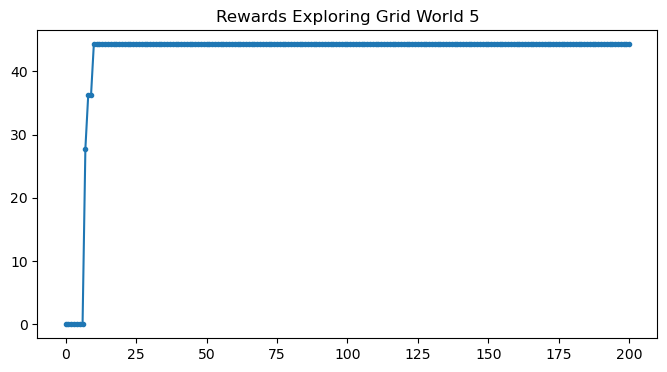

Reward: 44.3
Steady state found at 10 trials.
Optimal epsilon: 1.0
Optimal lambda: 1.0


In [1055]:
best_epsilon, best_lambda = optimize(5, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 6
Maze again, but this time with losing states instead of just slightly less rewarding states as walls. Here, the walls are bad enough that we never exploit them. There are only two places where the paths split up into the wrong and right paths, and one place where the path splits into the winning path and a slightly worse winning path.

0.6, 0.8 lands at the steady state the soonest. This appears to be enough exploration for the small world that we rule out the worse paths the soonest.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     32        92
     0.00      0.20                     32        92
     0.00      0.40                     32        92
     0.00      0.60                     32        92
     0.00      0.80                     32        92
     0.00      1.00                     32        92
     0.20      0.00                     32        92
     0.20      0.20                     32        92
     0.20      0.40                     32        92
     0.20      0.60                     32        92
     0.20      0.80                     33        92
     0.20      1.00                     60        92
     0.40      0.00                     32        92
     0.40      0.20                     32        92
     0.40      0.40                     32        92
     0.40      0.60                     32        92
     0.40      0.80                     32    

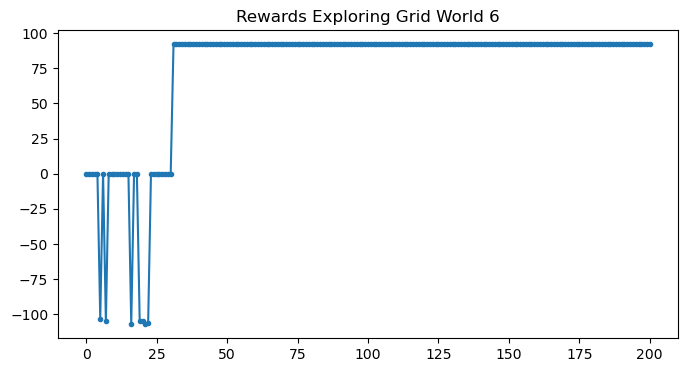

Reward: 92
Steady state found at 31 trials.
Optimal epsilon: 0.6000000000000001
Optimal lambda: 0.8


In [1056]:
best_epsilon, best_lambda = optimize(6, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 7
Optimal epsilon: 0.8

Optimal lambda: 0.8

Similar maze to world 6, but going down the wrong paths is more costly because they further diverge more often. Also there are more wrong paths. High initial exploration lets the agent rule out dead-end paths. This sets up the Q values well for later trials, where the agent can venture down the high Q-value path and reach the winning state.

If we have epsilon=1.0 and lambda=0.8, the initial exploration becomes too random and doesn't manage to set up the Q values soon enough to guarantee safe winning exploitation later on. In fact, the difference between these is only 1 trial, which is most likely the very first trial, where the agent is slightly more likely to run into a wall.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                     43        88
     0.00      0.20                     43        88
     0.00      0.40                     43        88
     0.00      0.60                     43        88
     0.00      0.80                     43        88
     0.00      1.00                     43        88
     0.20      0.00                     43        88
     0.20      0.20                     43        88
     0.20      0.40                     43        88
     0.20      0.60                     43        88
     0.20      0.80                     44        88
     0.20      1.00                    100        88
     0.40      0.00                     43        88
     0.40      0.20                     43        88
     0.40      0.40                     43        88
     0.40      0.60                     43        88
     0.40      0.80                     44    

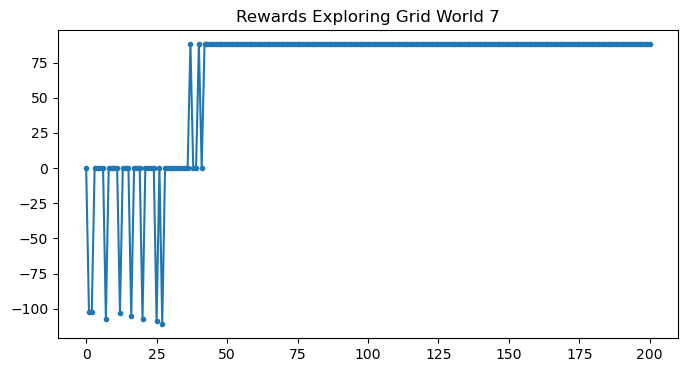

Reward: 88
Steady state found at 42 trials.
Optimal epsilon: 0.8
Optimal lambda: 0.8


In [1085]:
best_epsilon, best_lambda = optimize(7, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)

# World 8
Similar maze to the previous two but much larger. With 0 exploration, the policy manages to achieve a steady state as soon as any other pair of parameters. Most of the pairs do equally well here.

The agent doesn't need to explore much here. There is only 1 path that leads to the winning state, so the agent finds the path without any exploration by simply going into all the available dead ends first. Actually, I don't think I understand this one well enough, so that might be a stupid response.

Lambda=1.0 fails every time because it probably results in cycles more often. Overall, exploring later on is not worthwhile, because almost all paths that aren't the winning path lead to dead ends and there is little space for slightly improving on an already winning path.

  Epsilon    Lambda    Steady State Trials    Reward
---------  --------  ---------------------  --------
     0.00      0.00                    172        52
     0.00      0.20                    172        52
     0.00      0.40                    172        52
     0.00      0.60                    172        52
     0.00      0.80                    172        52
     0.00      1.00                    172        52
     0.20      0.00                    172        52
     0.20      0.20                    172        52
     0.20      0.40                    172        52
     0.20      0.60                    172        52
     0.20      0.80                    172        52
     0.20      1.00                    144         0
     0.40      0.00                    172        52
     0.40      0.20                    172        52
     0.40      0.40                    172        52
     0.40      0.60                    172        52
     0.40      0.80                    172    

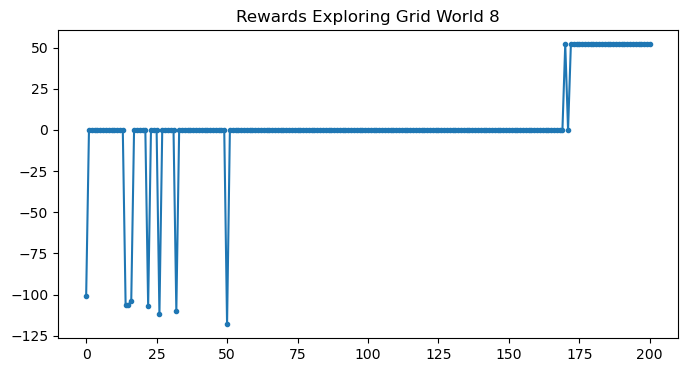

Reward: 52
Steady state found at 172 trials.
Optimal epsilon: 0.0
Optimal lambda: 0.0


In [1058]:
best_epsilon, best_lambda = optimize(8, 0, 200, print_each=False)
print("Optimal epsilon:", best_epsilon)
print("Optimal lambda:", best_lambda)